In [1]:
import numpy as np
from scipy.optimize import differential_evolution  #import differential evolution algorithm
import seaborn as sns

In [2]:
def travel1D(data):
    [x1,x2,x3,x4] = data
    start = 0
    stop = 10
    result = 0
    sequence = [start, x1, x2, x3, x4, stop]
    
    for i in range(1, len(sequence)):
        result = result + np.abs(sequence[i-1] - sequence[i])
        
    return result

In [3]:
bounds = [(0,10),(0,10),(0,10),(0,10)]
result = differential_evolution(travel1D, bounds)

In [4]:
result

     fun: 10.0
 message: 'Optimization terminated successfully.'
    nfev: 905
     nit: 14
 success: True
       x: array([0.56359633, 2.75921638, 7.3179969 , 7.58542261])

In [5]:
def travel2D(data):
    xy_data = [[0],[0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    
    cost = 0
    
    for i in range(1, len(xy_data[0])):
        cost = cost + np.sqrt((xy_data[0][i]-xy_data[0][i-1])**2+(xy_data[1][i]-xy_data[1][i-1])**2)**2
        
    
    return cost

In [6]:
bounds = [(0,1),(0,1),(0,1),(0,1),(0.2,0.2),(0.2,0.2),(0,1),(0,1),(0,1),(0,1),(0.2,0.2),(0.8,0.8),(0,1),(0,1),(0,1),(0,1),(0.3,0.3),(0.3,0.3),(0,1),(0,1)]
result = differential_evolution(travel2D, bounds)

C:\Users\2921228\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\_differentialevolution.py:901: RuntimeWarning: invalid value encountered in true_divide
  return (parameters - self.__scale_arg1) / self.__scale_arg2 + 0.5


In [7]:
print(result)

     fun: 0.7233333333335084
     jac: array([-3.10862447e-07,  4.44089210e-08, -3.10862447e-07, -1.22124533e-07,
        1.33334010e-01, -2.66666400e-01, -2.77555756e-07, -1.88737914e-07,
       -3.66373598e-07, -8.88178420e-08, -6.66660505e-02,  7.33333683e-01,
       -4.66293670e-07, -1.55431223e-07,  2.22044605e-07, -1.77635684e-07,
       -6.33333319e-01, -1.03333311e+00,  6.66133815e-08, -2.22044605e-08])
 message: 'Optimization terminated successfully.'
    nfev: 9168
     nit: 29
 success: True
       x: array([0.0666665 , 0.06666665, 0.13333317, 0.13333329, 0.2       ,
       0.2       , 0.19999984, 0.39999991, 0.19999982, 0.59999993,
       0.2       , 0.8       , 0.23333321, 0.63333324, 0.26666665,
       0.46666657, 0.3       , 0.3       , 0.65000001, 0.64999999])


In [8]:
def d(data):
    xy_data = [[0],[0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    
    cost = 0
    
    for i in range(1, len(xy_data[0])):
        cost = cost + np.sqrt((xy_data[0][i]-xy_data[0][i-1])**2+(xy_data[1][i]-xy_data[1][i-1])**2)**2
        
    
    return xy_data

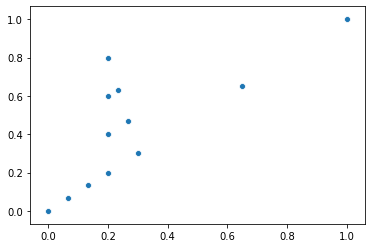

In [9]:
data = d([0.06666657, 0.06666684, 0.13333327, 0.13333354, 0.2       ,
       0.2       , 0.19999997, 0.40000031, 0.19999992, 0.60000019,
       0.2       , 0.8       , 0.23333309, 0.63333356, 0.26666648,
       0.46666693, 0.3       , 0.3       , 0.65000003, 0.65000016])
sns.scatterplot(x = data[0], y=data[1])

In [10]:
P2x = 0
P2y = -1

P1x = 0
P1y = 0

P3x = 1
P3y = 1

rad = np.arctan2(P3y - P1y, P3x - P1x) - np.arctan2(P2y - P1y, P2x - P1x)
print (rad/2/np.pi*360)

135.0


In [11]:
def t2Da(data):
    xy_data = [[0,0],[-1,0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    xy_data[0].append(2)
    xy_data[1].append(1)
    
    cost = 0
    
    for i in range(2, len(xy_data[0])):
        
        P2x = xy_data[0][i-2]
        P2y = xy_data[1][i-2]

        P1x = xy_data[0][i-1]
        P1y = xy_data[1][i-1]

        P3x = xy_data[0][i]
        P3y = xy_data[1][i]

        rad = np.arctan2(P3y - P1y, P3x - P1x) - np.arctan2(P2y - P1y, P2x - P1x)
        deg = 180 - np.abs(rad/2/np.pi*360)
        
        if deg >= 180:
            deg = deg - 180

        
        cost = cost  + deg**2


    return cost

In [19]:
n=4 #how many points?
bounds = []
for i in range(n*2):
    bounds.append((0,1))
    
result = differential_evolution(t2Da, bounds, maxiter=1000000)

result

     fun: 1012.5000000668606
     jac: array([ 0.00180762, -0.00389946,  0.02468141, -0.02046363, -0.09086989,
        0.07744347,  0.04738467, -0.04635012,  0.01135732, -0.02368097,
        0.01799663, -0.10852546])
 message: 'Optimization terminated successfully.'
    nfev: 84617
     nit: 467
 success: True
       x: array([0.02364218, 0.11885858, 0.09592931, 0.2933769 , 0.2499569 ,
       0.52389757, 0.43676369, 0.71070524, 0.75301395, 0.92201829,
       0.88702267, 0.97752705])

In [20]:
def dt2Da(data):
    xy_data = [[0,0],[-1,0]]
    
    for i in range(len(data)):
        if i%2 == 0:
            xy_data[0].append(data[i])
        else:
            xy_data[1].append(data[i])
            
    xy_data[0].append(1)
    xy_data[1].append(1)
    xy_data[0].append(2)
    xy_data[1].append(1)
    
    
    return xy_data

0 0 0 -1 0.02364218336965877 0.11885858486501942
11.249879840930816
126.55979643538157
0.02364218336965877 0.11885858486501942 0 0 0.09592930742703329 0.29337689893472557
11.249916008716639
253.1204066385605
0.09592930742703329 0.29337689893472557 0.02364218336965877 0.11885858486501942 0.24995689945031982 0.5238975716423719
11.249964086030872
379.68209857554496
0.24995689945031982 0.5238975716423719 0.09592930742703329 0.29337689893472557 0.4367636933906944 0.7107052446467939
11.250105255141904
506.24696682731644
0.4367636933906944 0.7107052446467939 0.24995689945031982 0.5238975716423719 0.7530139503289541 0.9220182885787864
11.249962211162853
632.8086165799086
0.7530139503289541 0.9220182885787864 0.4367636933906944 0.7107052446467939 0.8870226696328899 0.977527052940331
11.249977228347802
759.3706042182528
0.8870226696328899 0.977527052940331 0.7530139503289541 0.9220182885787864 1 1
11.250020324198857
885.9335615131401
1 1 0.8870226696328899 0.977527052940331 2 1
11.2501750454702


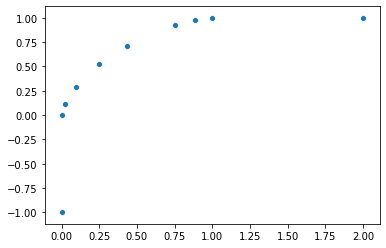

In [21]:
data = dt2Da(result.x)
sns.scatterplot(x = data[0], y=data[1])